### Monte Carlo Simulations (Section 8.3 in Text)

Monte Carlo simulations are used to calculate probabilities using random numbers when the probabilities are difficult (or impossible) to calculate by hand or have to be done many times.


Basic idea:  Perform N experiments (numerically), where the outcome is random (or at least unknown), with some event occuring M times, or with a probability M/N each time.  If the experiment is performed many times, M/N yields an estimate of the probability.

There are many examples in astrophysics:

* Scattering of a photon by atoms or molecules
* Detection of a weak signal (say a galaxy) in the 
   presence of noise (say sky noise and electronics noise)
* Observation of a particular power law in galaxy number    
   counts given a model power law in the presence of noise
* Markov Chain Monte Carlo for determining models
   that best describe data

#### Q. Have you encountered any other examples?

In [1]:
from IPython.display import Image

In [2]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg/251px-The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg')

#### Q. How would you estimate the time it takes for a photon to travel from the core to the surface?

In [3]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Sun_poster.svg/500px-Sun_poster.svg.png')

This is a 3D random walk (if you take ASTR3730 you'll see a derivation of this).

http://en.wikipedia.org/wiki/Random_walk has a good intro for some of the maths involved.

### Random Walk in One Dimension

For simplicity, we will assume the same distance between scatterings 
(and set that distance, or the "mean free path", equal to 1).

#### Q. What do you think the typical distance a particle will have traveled  (in net distance from its starting point) after a large number of steps ($N_s$)?

In fact, for large $N_s$ the average distance traveled will be $\sqrt{N_s}$.

#### Q. Put another way, on average, what is the final position of a particle  undergoing a 1D random walk with respect to its starting point?

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pylab as pl

Let's compute tau by using a Monte Carlo experiment.

Area of enclosed circe in a square vs that area of the square is:

$$ \frac{\frac{1}{2}\tau r^2}{\left(2r\right)^2} = \frac{\tau}{8}$$

This means, if we could somehow find the actual ratio of these areas, we could multiply it with 8 to get the value of $\tau$!

In [ ]:
pl.plot?

tau is 6.2928


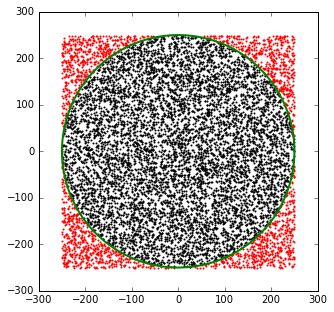

In [7]:
N = 10000
radius = 250
tau = 2*np.pi

x = np.random.randint(-radius, radius, N)
y = np.random.randint(-radius, radius, N)
distances = np.sqrt(x**2 + y**2)

phi = np.arange(0, tau, 0.01)

pl.figure(figsize=(5,5))
pl.scatter(x[np.argwhere(distances <= radius)],
           y[np.argwhere(distances <= radius)],
           color='k', s=1);
pl.scatter(x[np.argwhere(distances > radius)],
           y[np.argwhere(distances > radius)],
           color='r', s=1);

pl.plot(radius * np.cos(phi), radius * np.sin(phi), color='g', linewidth=2);

print("tau is", 8.0 * np.sum(distances < radius) / float(N))

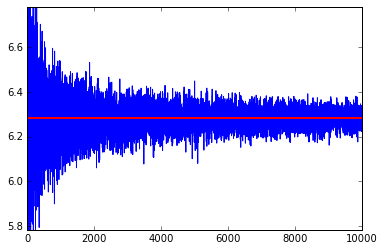

In [8]:
tauArray = np.zeros(N)

for num in np.arange(N):
    xArray = np.random.randint(-radius, radius, num + 1)
    yArray = np.random.randint(-radius, radius, num + 1)
    tauArray[num] = 8.0 * np.sum(np.sqrt(xArray**2 + yArray**2) < radius) / float(num + 1)

pl.plot(np.arange(N), tauArray);
pl.axhline(y=tau, lw=2, color='r')
pl.ylim(tau - 0.5, tau + 0.5);

In [10]:
import random

# Number of particles
Np = 100

# Number of steps (per particle)
Ns = 50000

# All particles start at x = 0
positions = np.zeros(Np)  

distances = np.zeros(Np)

# A (randomly drawn) 1 will move the particle to the left
# and a 2 will move it to the right
Left = 1; Right = 2  

# Step Ns times for each particle "p"
for p in range(Np):
    for step in range(Ns):
        
        # Integer random number generator
        direction = random.randint(1, 2) 
        # returns a random integer x such that 1 <= x <= 2
        # (effectively a coin-flip here)
        
        if direction == Left:
            positions[p] -= 1  # Move left
        elif direction == Right:
            positions[p] += 1  # Move right

#### Q. Does "positions" contain the final position of each particle, or the entire trajectory of each particle?

In [12]:
print("Positions")
print(positions)

Positions
[ 232.   16.    6.  214.  214. -146.   16. -152.  -58.  -44.  -70. -790.
   76.  118.  -88. -288. -282.  218.  426.   82.   46.   38.    8. -200.
   68.   24.  346.  -66.  400.  -74.  430.  168.  280. -234.  230. -404.
 -134.   70. -262. -112.  -30. -218. -102. -142. -448. -190.  150.   64.
  -90.  368. -114.  142.  690. -278.  274.  268.  190. -332.   58. -184.
  278.   84.  -56. -298.  144.  234.   24.   -8.  196. -152. -242. -154.
    6.  114. -108.  330.  108.  -30. -196.  -24.  214.  268.  -86.  752.
  -28.  262.  -12.  186.  388. -148.   18.  -10.   92.  322.   32. -250.
 -288. -128.  -24.  130.]


#### Q. How can we get the average position of all particles?          

In [13]:



















print("Average Position", positions.mean())

Average Position 23.38


#### Q. And the average traveled distance for all particles?       

In [14]:


















print("Avg Separation", abs(positions).mean())
print("Expectation    %g" % np.sqrt(4*Ns/tau))

Avg Separation 178.86
Expectation    178.412


$\sqrt{\frac{4N_s}{\tau}}$ is the theoretical expectation value for the separation for a large number of tests run, in 1D. (different values for higher dimensions).

In [15]:
# Standard deviation
positions.std()

233.34038570294686

#### Q. What should this histogram look like? Should it be centrally peaked? If so, at what value? How wide?

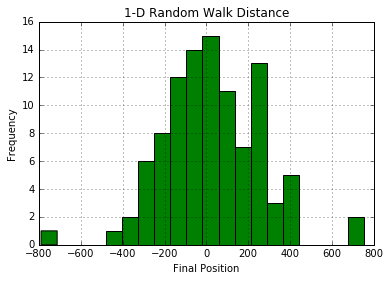

In [16]:
n, bins, patches = pl.hist(positions, 20, facecolor='g')
pl.xlabel('Final Position')
pl.ylabel('Frequency')
pl.title('1-D Random Walk Distance')
pl.grid(True)

### VECTORIZATION of Implementation

### NOTE the difference in arguments!

#### Inclusive right limit
random.randint(1, 2)
#### Exclusive right limit
np.random.randint(1, 3)

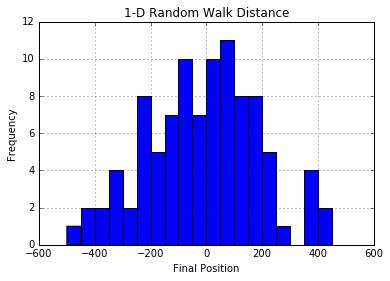

In [17]:
Np = 100    # Number of particles
Ns = 50000  # Number of steps (per particle)

# Draw the move random number steps all at once:
moves = np.random.randint(1, 3, size=Np*Ns)
# FOR np.random.randint THIS RUNS FROM 1 TO 2, INTEGERS ONLY

# Q. What's happening here?
moves = 2 * moves - 3

# Create a 2-D array of moves so that moves[i, j]
# is the "i"th step of particle j:
moves.shape = (Ns, Np)

# Create an array of initial starting positions for each particle
positions = np.zeros(Np)

for step in range(Ns):
    # Select the moves values for the current step:
    positions += moves[step, :]
    # Updates positions for all particles in this step
    # This is vectorized:  I'm not looping over the particles

# Histogram the results
n, bins, patches = pl.hist(positions, bins=np.arange(-500, 500, 50), facecolor='b')
pl.xlabel('Final Position')
pl.ylabel('Frequency')
pl.title('1-D Random Walk Distance')
pl.grid(True)

In [ ]:
print("Average Position", np.mean(positions))
print("Avg Separation  ", np.mean(abs(positions)))
print("Expectation      %g" % np.sqrt(4*Ns/tau))

### Files

Basic file operation works via the `open()` function:

In [20]:
f = open('afile')

FileNotFoundError: [Errno 2] No such file or directory: 'afile'

In [21]:
f = open('afile', 'w')

In [22]:
type(f)

_io.TextIOWrapper

In [23]:
f.write('testing\n')

8

In [24]:
f.close()

In [25]:
cat afile

testing


In [29]:
f = open('afile')  # default mode: read

In [27]:
f.read()

'testing\n'

In [28]:
f.write('more tests\n')

UnsupportedOperation: not writable

In [30]:
f.close()

In [31]:
f = open('afile', 'w')

In [32]:
f.read()

UnsupportedOperation: not readable

In [33]:
f.close()
f = open('afile', 'a')  # append!

In [34]:
cat afile

### Use so called `context manager`:

In [35]:
with open('afile', 'w') as f:
    f.write('testing\nmore tests\n')

In [36]:
cat afile

testing
more tests


In [37]:
with open('afile', 'r') as f:
    data = f.read()
data

'testing\nmore tests\n'

In [38]:
with open('afile', 'r') as f:
    data = f.readlines()
data

['testing\n', 'more tests\n']

In [41]:
s = 'mystring '

In [44]:
s.strip('m ')

'ystring'

In [45]:
data = [item.strip() for item in data]
data

['testing', 'more tests']

In [53]:
row = ' '.join(['1','2','3'])

In [ ]:
f.write(row+'\n')